## Capstone Project_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
import seaborn as sns

from IPython import display
from ipywidgets import interact, widgets

%config InlineBackend.figure_format = 'retina'

# Setup Seaborn
sns.set_style("darkgrid")
sns.set_context("poster",font_scale=0.7,rc={"lines.linewidth": 1})
sns.set_color_codes(palette='muted')

In [2]:
data = pd.read_csv('Train_Loan_Home.csv')
test_data = pd.read_csv('Test_Loan_Home.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID                     367 non-null object
Gender                      356 non-null object
Married                     367 non-null object
Dependents                  357 non-null object
Education                   367 non-null object
Self_Employed               344 non-null object
ApplicantIncomeMonthly      367 non-null int64
CoapplicantIncomeMonthly    367 non-null int64
LoanAmountThousands         362 non-null float64
Loan_Amount_Term_Months     361 non-null float64
Credit_History              338 non-null float64
Property_Area               367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
def most_common(col):
    most_cmn=pd.get_dummies(col).sum().sort_values(ascending = False).index[0]
    return most_cmn

In [7]:
def replace_missing(col):
    most_cmn = most_common(col)
    for i in range(len(col)):
        if pd.isnull(col[i]):
            col[i] = most_cmn
            inplace=True
        

In [8]:
replace_missing(data.Gender)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
replace_missing(data.Married)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
replace_missing(data.Self_Employed)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
replace_missing(data.Dependents)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
data['Dependents'].replace('3+','3' ,inplace=True)

In [13]:
data.LoanAmount[data.LoanAmount.isnull()] = data.LoanAmount.mean()

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
replace_missing(data.Credit_History)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
replace_missing(data.Loan_Amount_Term)

C:\Users\satmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [17]:
data["Total_Income"] = data["ApplicantIncome"]+data["CoapplicantIncome"]

By considering the above link, I have found that on an average it would be around 8.5% to 9.5%. Hence for safe-side I am assuming that 9% is the interest rate.

A = P * R * (1+R)^N

B = (1+R)^(N-1)

EMI = A/B.

In [18]:
data["EMI"] = (data["LoanAmount"]*0.09*(1.09**data["Loan_Amount_Term"]))/(1.09**(data["Loan_Amount_Term"]-1))

In [ ]:
test_datae["Total_Income"] = test_data["ApplicantIncome"]+test_data["CoapplicantIncome"]
test_data["EMI"] = (test_data["LoanAmount"]*0.09*(1.09**test_data["Loan_Amount_Term"]))/(1.09**(test_data["Loan_Amount_Term"]-1))

In [19]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,14.363033
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,12.556800
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,6.474600
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,11.772000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,13.832100


In [20]:
def feature__countplot(col):
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar',color=('b','darkorange'))
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title("Homeloan_"+col+"Status")
    plt.savefig("Homeloan_"+col+"Status.jpeg",bbox_inches = 'tight')
    plt.show()

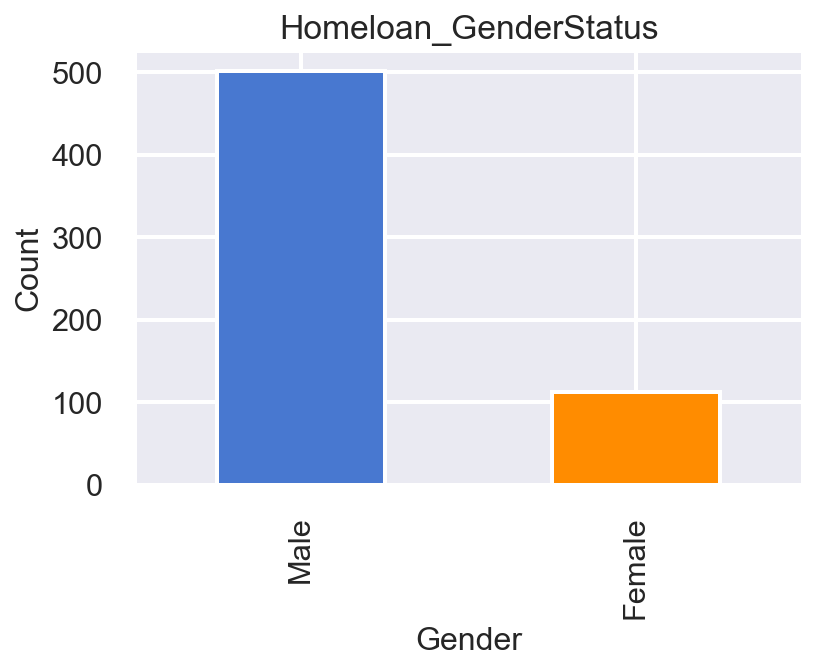

In [21]:
feature__countplot("Gender")

#### Gender Column:

According to our analysis, Gender may influence home loan approval. As we can conclude that, mortgage lenders were more inclined towards men than women expecting men to be the lead borrowers on single applications.

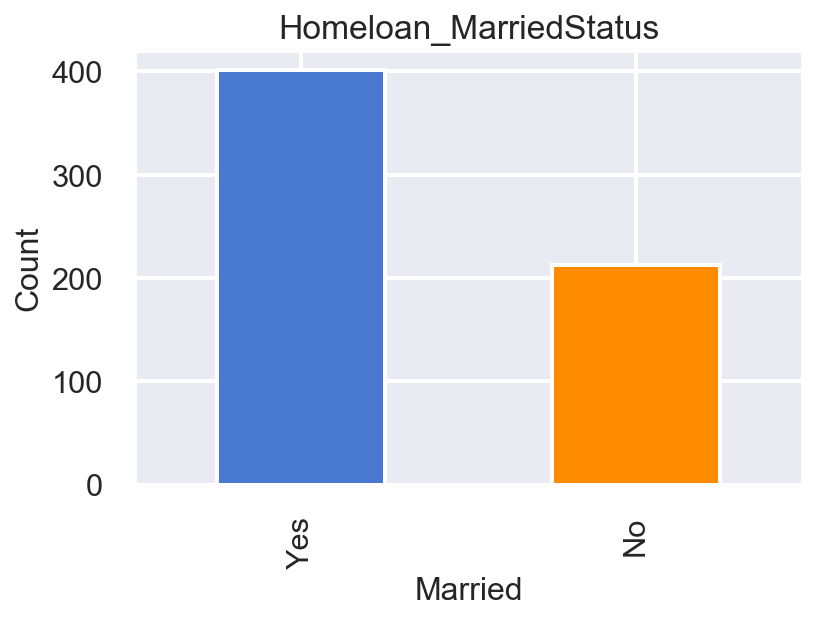

In [22]:
feature__countplot("Married")

#### Marital Status:

From the above results, we can conclude that most of the home loans were approved to married couples compared to persons who are single or with no relationship.

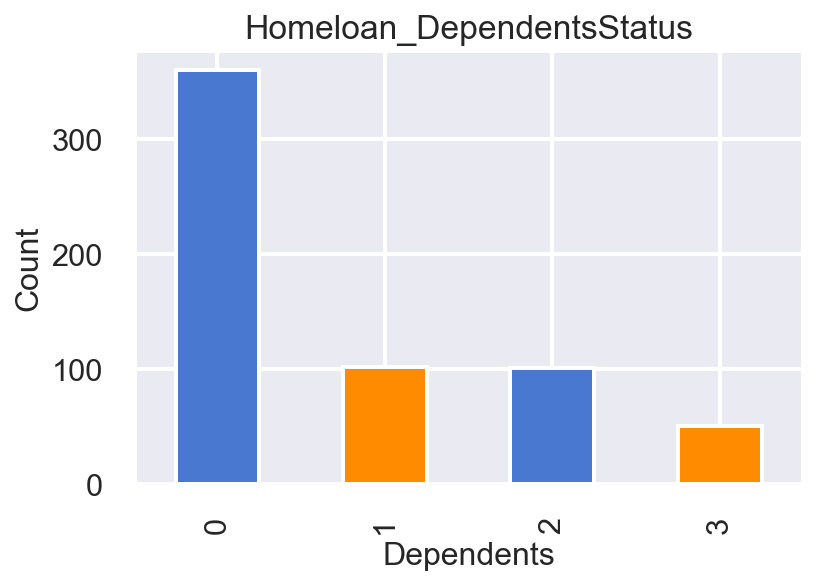

In [23]:
feature__countplot("Dependents")

#### Dependents: 

From the analysis, we can conclude that the number of dependents may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents.

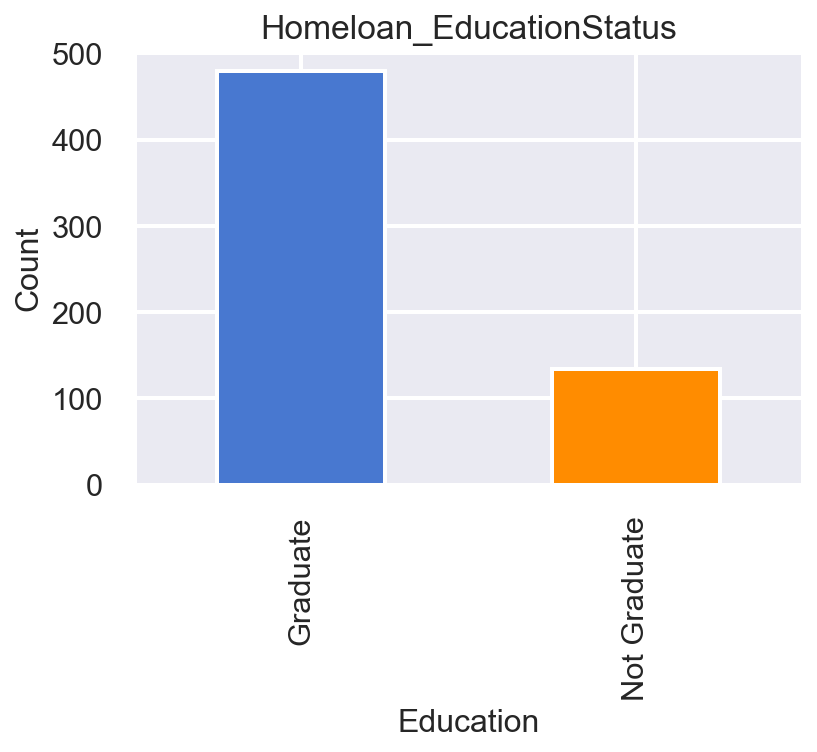

In [24]:
feature__countplot("Education")

#### Education:

From the analysis, we can conclude that the educational status may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who are graduates.

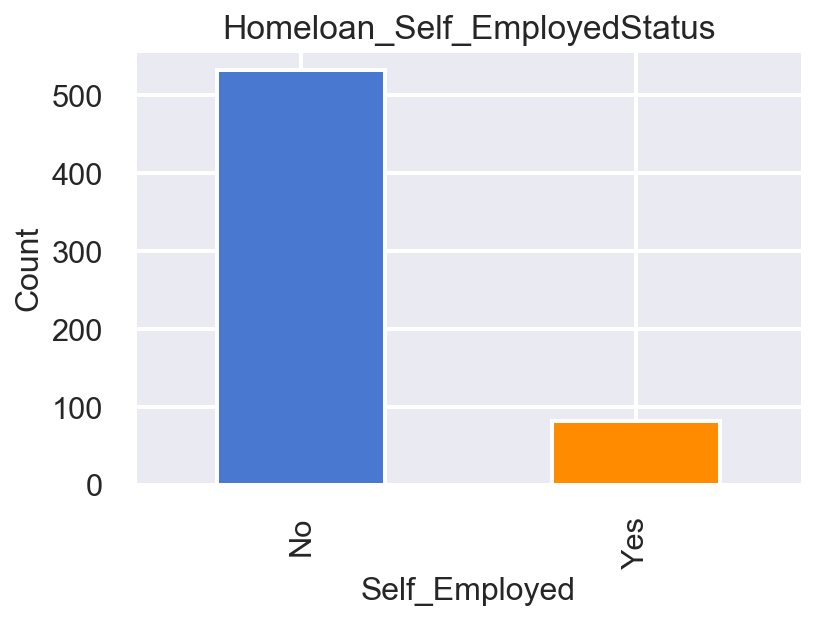

In [25]:
feature__countplot("Self_Employed")

#### Employment:

From the analysis, we can conclude that the employment status may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who are self_employed.

In [26]:
def feature_comp_plot(col1,col2):
    
    fig, ax = plt.subplots(figsize=(6,4)) 
    
    x2 = data.groupby([col1,col2])['Loan_ID'].count()
    x2 = x2.reset_index()
    
    stats = x2[col2].drop_duplicates()
    margin_bottom = np.zeros(len(x2[col1].drop_duplicates()))
    colors = ["#006D2C", "#31A354","#74C476"]
    
    for num, status in enumerate(stats):
        values = list(x2[x2[col2] == status].loc[:, 'Loan_ID'])
        x2[x2[col2] == status].plot.bar(x=col1,y='Loan_ID', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=status)
        margin_bottom += values
    ax.set_title(col1+" vs. "+col2)
    plt.savefig(col1+" vs. "+col2+".jpeg",bbox_inches = 'tight')
    plt.show()
    

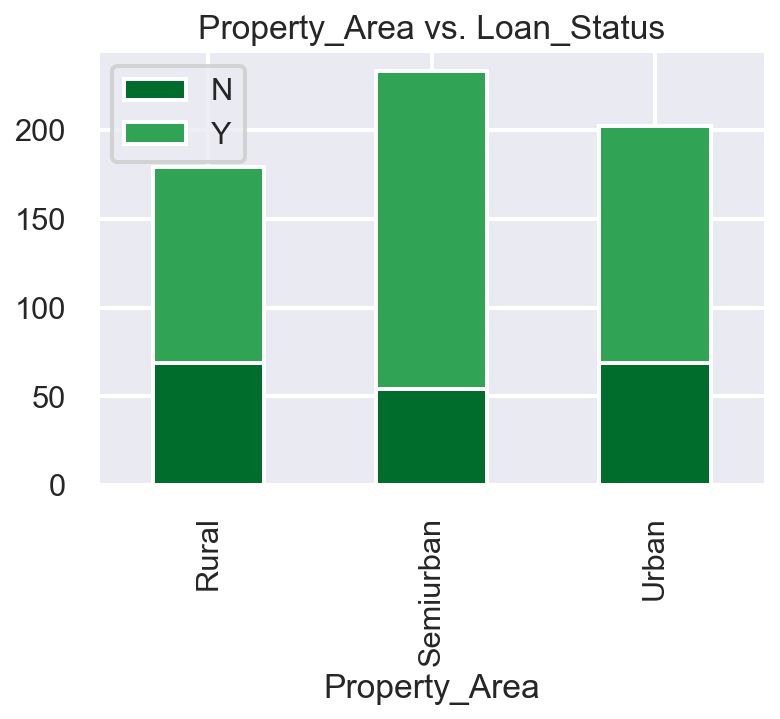

In [27]:
feature_comp_plot("Property_Area","Loan_Status")

#### Relationship between Property area and loan status:

From the above results we can infer that, the higher percentage of loan approval is for semi-urban houses followed by urban and rural houses.

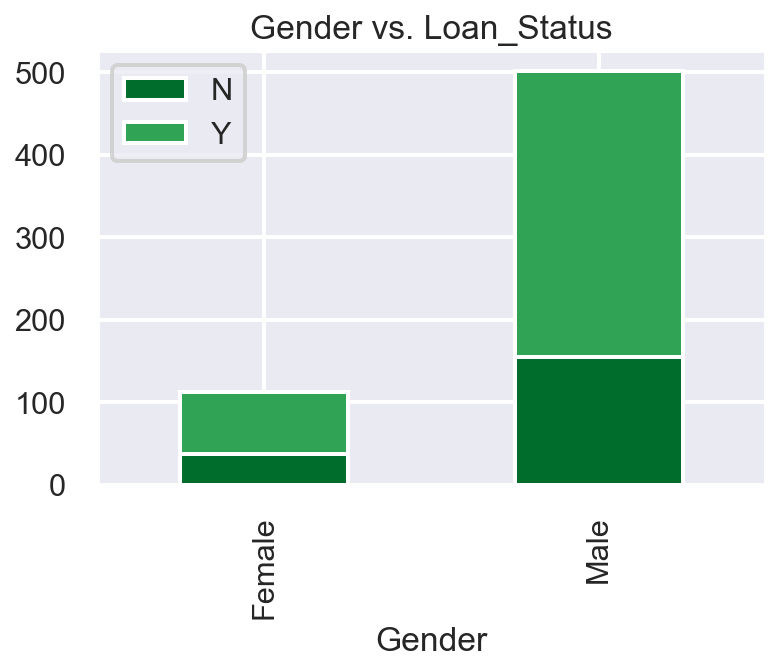

In [28]:
feature_comp_plot("Gender","Loan_Status")

#### Relationship between Gender and Loan status:

From the data analysis, we can conclude that male gender as primary applicants have higher percentage of loan approval than female as primary applicants.

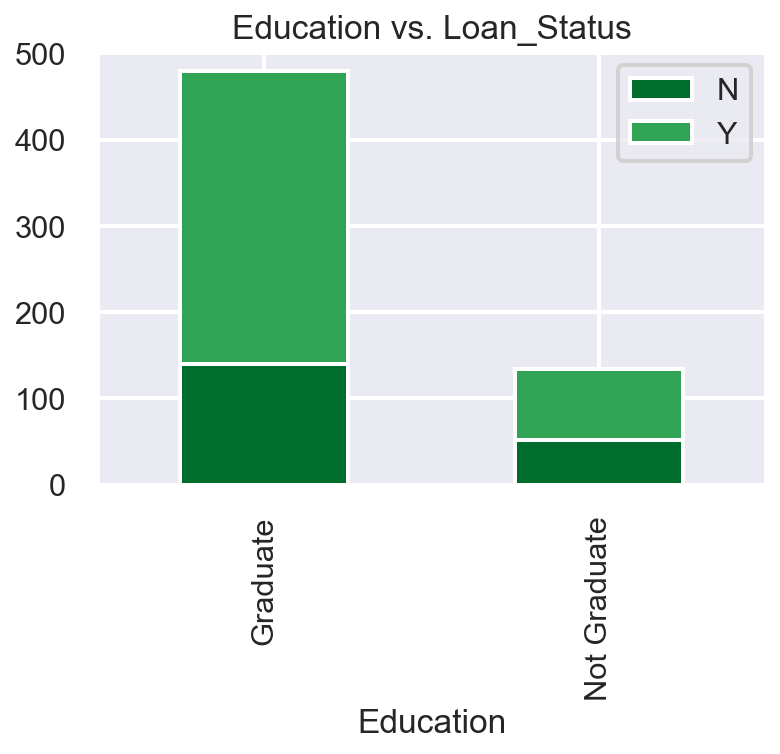

In [29]:
feature_comp_plot("Education","Loan_Status")

#### Relationship between education vs Loan status: 

From the analysis, we can conclude that the applicants who are graduate were in higher percentage of loan approval than non-graduate applicants.

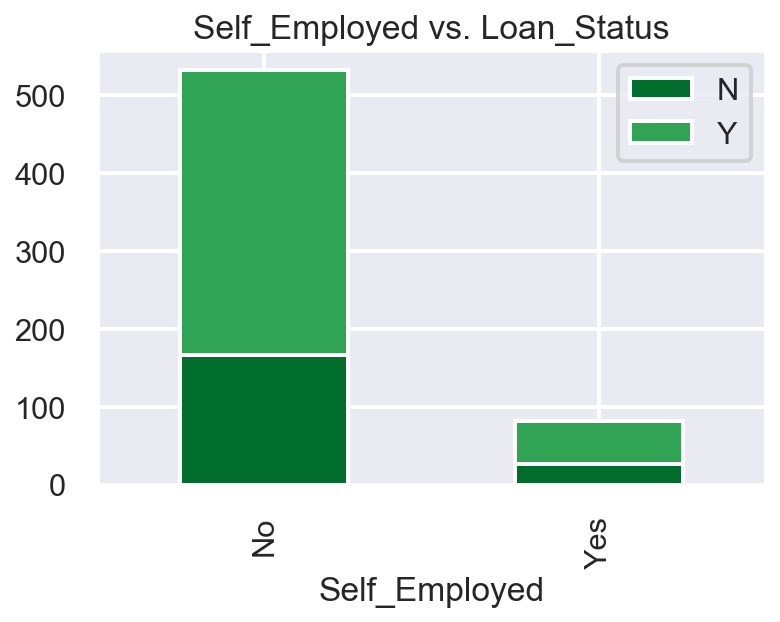

In [30]:
feature_comp_plot("Self_Employed","Loan_Status")

#### Relationship between Self-Employed vs Loan_Status: 

From the data analysis, we can conclude that home-ownership rates for self-employed households were more declined than for salaried households.

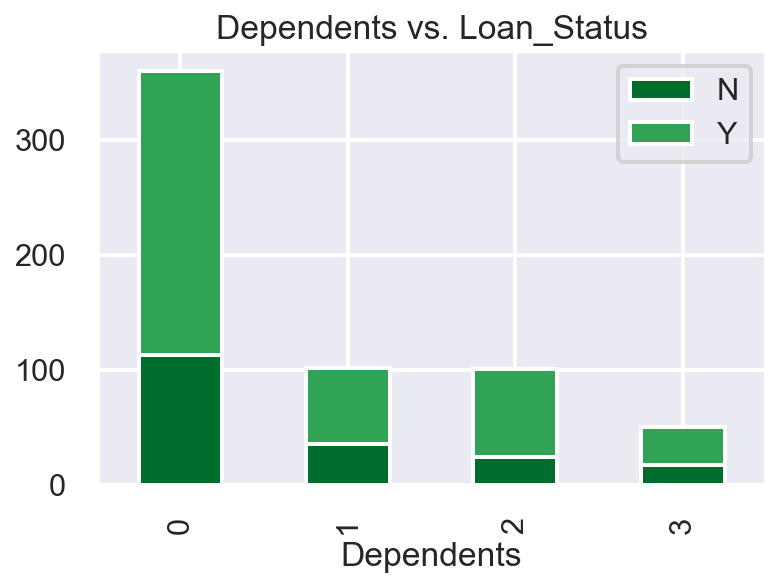

In [31]:
feature_comp_plot("Dependents","Loan_Status")

#### Relationship between Dependents vs Loan status: 

From the analysis, we can conclude that the number of dependents may automatically affected the approvals of home loans. There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents.

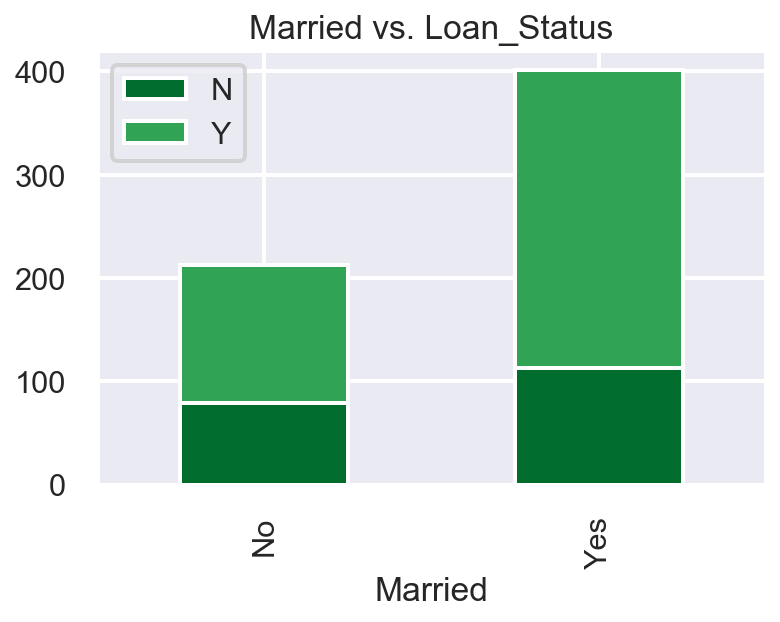

In [32]:
feature_comp_plot("Married","Loan_Status")

#### Relationship between Marital status vs Loan status: 

From the analysis, we can conclude that the highest number of customers are married who were eligible for the home loan approval than single customers.

### Machine Learning Algorithms: 

Converting the categorical variables into numerical values using map function

In [33]:
data.Education=data.Education.map({'Not Graduate':0,'Graduate':1})

In [34]:
data.Property_Area=data.Property_Area.map({'Rural':0,'Semiurban':1,'Urban':2})

In [35]:
data.Loan_Status=data.Loan_Status.map({'N':0,'Y':1})

In [36]:
data.Self_Employed=data.Self_Employed.map({'No':0,'Yes':1})

In [37]:
data.Married=data.Married.map({'No':0,'Yes':1})

In [38]:
data.Gender=data.Gender.map({'Female':0,'Male':1})

In [39]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [40]:
X = data.drop(['Loan_Status'], axis=1)
y = data["Loan_Status"]

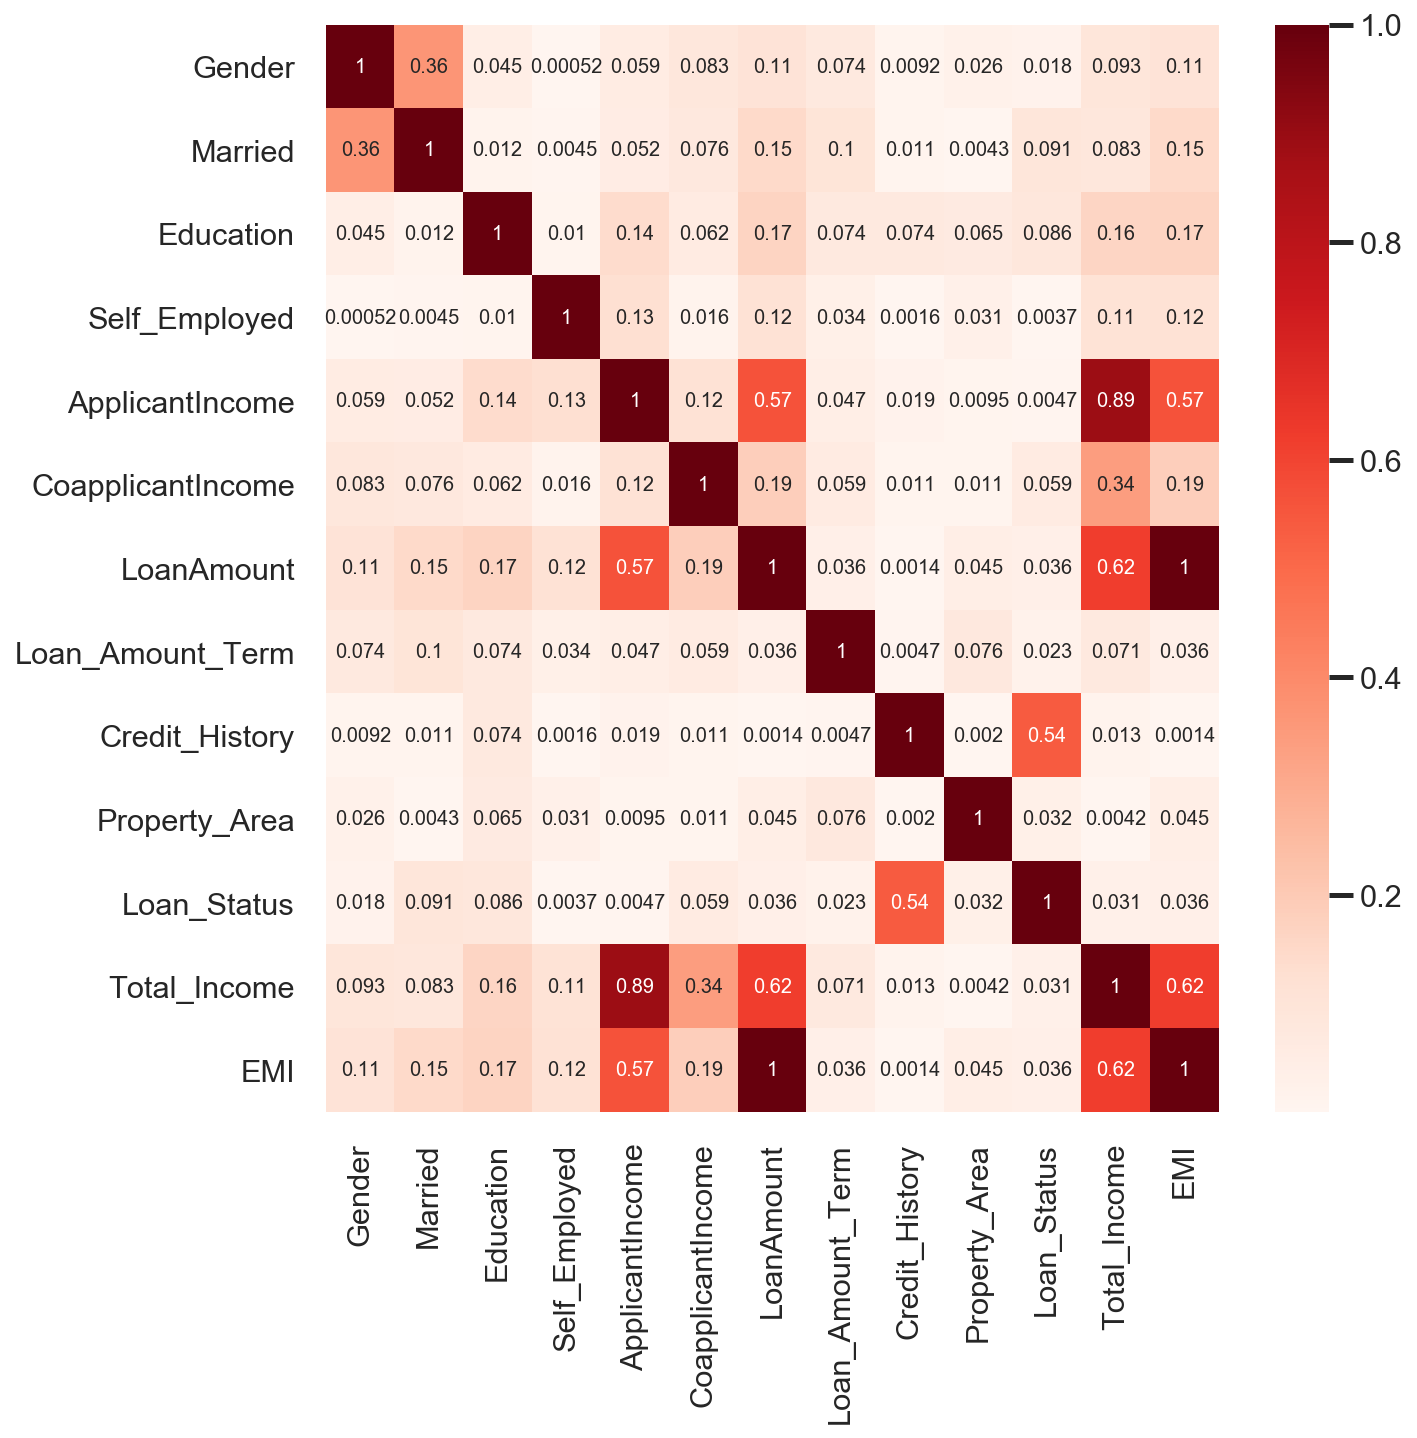

In [42]:
plt.figure(figsize=(10,10))
import math
cor = abs(data.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("correlation_graph.jpeg",bbox_inches = 'tight')
plt.show()